In [1102]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.nn.functional as F

In [1103]:
raw_df=pd.read_csv('datasets/titanic/train.csv')
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1104]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1105]:
df=raw_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

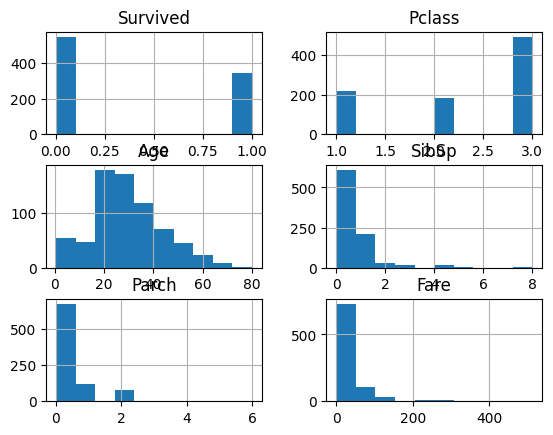

In [1106]:
df.hist()

In [1107]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1108]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [1109]:
modeE=df['Embarked'].mode().iloc[0]
df['Embarked']=df['Embarked'].fillna(modeE)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [1110]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [1111]:
scaler=StandardScaler()
encoder1=LabelEncoder()
encoder2=LabelEncoder()

In [1112]:
df['Sex']=encoder1.fit_transform(df['Sex'])
df['Embarked']=encoder2.fit_transform(df['Embarked'])

In [1113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [1114]:
age_x=df[df['Age'].isnull()].drop(columns=['Age','Survived'])
age_train=df[df['Age'].notnull()]

In [1115]:
age_x_train=age_train.drop(columns=['Age','Survived'])
age_y_train=age_train['Age']
ageModel=LinearRegression()
ageModel.fit(age_x_train,age_y_train)
pred_ages=ageModel.predict(age_x)
df.loc[df['Age'].isnull(), 'Age'] = pred_ages

In [1116]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1117]:
for column in df.columns:
    df[column]=df[column].astype(float)

In [1118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [1119]:
df.shape

(891, 8)

In [1120]:
x_train=df.drop(columns=['Survived'])
x_train=torch.from_numpy(scaler.fit_transform(x_train))
x_train = x_train.to(torch.float32)
y_train=torch.from_numpy(df['Survived'].values)

In [1121]:
class classifier(nn.Module):
    def __init__(self,num_inputs,hidden,num_outputs):
        super().__init__()
        self.linear1=nn.Linear(num_inputs,hidden)
        self.act1=nn.Tanh()
        self.linear2=nn.Linear(hidden,num_outputs)
    def forward(self,x):
        x=self.linear1(x)
        x=self.act1(x)
        x=self.linear2(x)
        return x

In [1122]:
model=classifier(7,4,1)

In [1123]:
loss_=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [1124]:
for i in range(1000):
    preds=model(x_train).squeeze(dim=1)
    loss=loss_(preds,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [1125]:
state_dict=model.state_dict()

In [1126]:
torch.save(state_dict, "our_model.tar")

In [1127]:
test_df=pd.read_csv('datasets/titanic/test.csv')

In [1128]:
ne_df=test_df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [1129]:
ne_df['Fare'] = ne_df['Fare'].fillna(ne_df['Fare'].median())
ne_df['Sex']=encoder1.transform(ne_df['Sex'])
ne_df['Embarked']=encoder2.transform(ne_df['Embarked'])

In [1130]:
ne_df.shape

(418, 7)

In [1131]:
ne_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [1132]:
ne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [1133]:
age_test=ne_df[ne_df['Age'].isnull()]
age_test.Age.isnull().sum(),age_test.shape

(86, (86, 7))

In [1134]:
age_test=age_test.drop(columns=['Age'])

In [1135]:
test_pred=ageModel.predict(age_test)

In [1136]:
ne_df.loc[ne_df['Age'].isnull(), 'Age'] = test_pred
ne_df.shape

(418, 7)

In [1137]:
x_test=torch.from_numpy(scaler.fit_transform(ne_df.values))
x_test= x_test.to(torch.float32)
x_test.shape

torch.Size([418, 7])

In [1138]:
state_dict = torch.load("our_model.tar")

C:\Users\heman\AppData\Local\Temp\ipykernel_17472\2763736352.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("our_model.tar")


In [1139]:
model.eval()
with torch.no_grad():
    logits=model(x_test)
    probs=torch.sigmoid(logits)
    predictions=(probs>=0.5).float()

In [1140]:
y_test1=pd.read_csv('datasets/titanic/gender_submission.csv')

In [1141]:
y_test1=y_test1['Survived']

In [1142]:
y_test = torch.tensor(y_test1.values, dtype=torch.float32)
accuracy = (predictions.squeeze() == y_test).float().mean()
print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8876


In [1143]:
print("Predictions shape:", predictions.shape)
print("y_test shape:", y_test.shape)

Predictions shape: torch.Size([418, 1])
y_test shape: torch.Size([418])
